In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
##### Reading allele frequencies for whole genome #####
whole_genome_df = pd.DataFrame(columns = ['chrom','start','end','afreq'])
for i in range(1,23):
    df = pd.read_csv("/gymreklab-tscc/helia/ensembl/experiments/allele_freq/freqs/all_freqs_chr" + str(i) + ".tab", sep="\t")
    df = df[['chrom','start','end','afreq']]
    df['afreq'] = df['afreq'].str.split(",").str.len()
    whole_genome_df = whole_genome_df.append(df, ignore_index=True)

whole_genome_df = whole_genome_df.drop_duplicates(keep="first", subset=['chrom','start'])

In [27]:
##### Subsetting allele frequencing for overlap with coding regions #####

coding_regions = pd.read_csv("/gymreklab-tscc/helia/ensembl/experiments/coding_regions/intersect.txt",sep="\t", header=None)
coding_regions.columns = ['chrom','start','end']
coding_regions_df = pd.merge(coding_regions, whole_genome_df, on = ['chrom','start'], how='left')

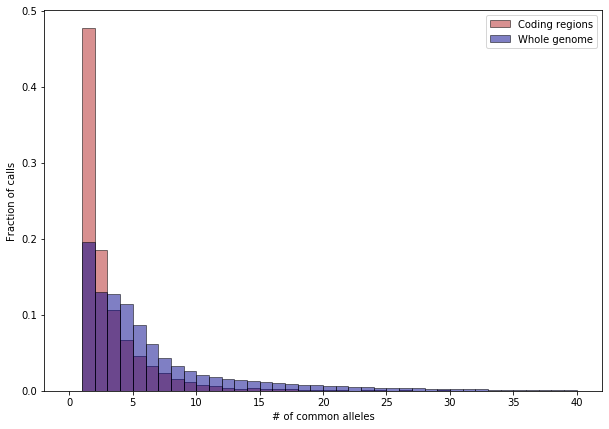

In [55]:
max_range = 40
plt.figure(figsize=(10,7))
plt.hist(coding_regions_df['afreq'], bins=max_range, density=True, \
         range = (0,max_range), alpha = 0.5, edgecolor = "black", color='firebrick', label="Coding regions")
plt.hist(whole_genome_df['afreq'], bins=max_range, density = True, \
         range = (0,max_range), alpha = 0.5, edgecolor = "black", color='darkblue', label = "Whole genome" )
plt.xlabel("# of common alleles")
plt.ylabel("Fraction of calls")
plt.legend()
plt.savefig("../plots/coding_polymorphism.pdf", dpi=1200, format='pdf')